In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_excel('/content/drive/MyDrive/Prices.xlsx',
                 sheet_name='Daily',
                 usecols='A:B'
                #  index_col='Name'
                 )

In [ ]:
df.head()

,Name,USD
0,1978-12-29,226.00
1,1979-01-01,226.00
2,1979-01-02,226.80
3,1979-01-03,218.60
4,1979-01-04,223.15


In [ ]:
df.set_index('Name',inplace=True)

In [ ]:
df = df.loc[(df.index.year > 2015), :]
df.index = pd.to_datetime(df.index)


In [ ]:
df.head()

,USD
Name,
2016-01-01,1060.00
2016-01-04,1082.25
2016-01-05,1077.00
2016-01-06,1091.40
2016-01-07,1106.35


In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose
# holt winters
# single exponential smoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
# double and triple exponential smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
# metrics
from sklearn.metrics import mean_absolute_error

<Axes: xlabel='Name'>

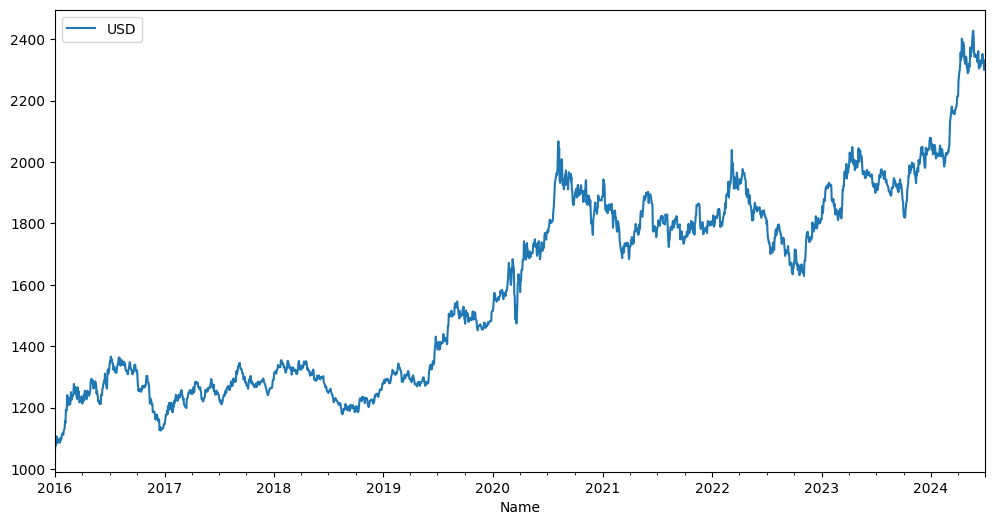

In [ ]:
df[['USD']].plot(figsize=(12,6))

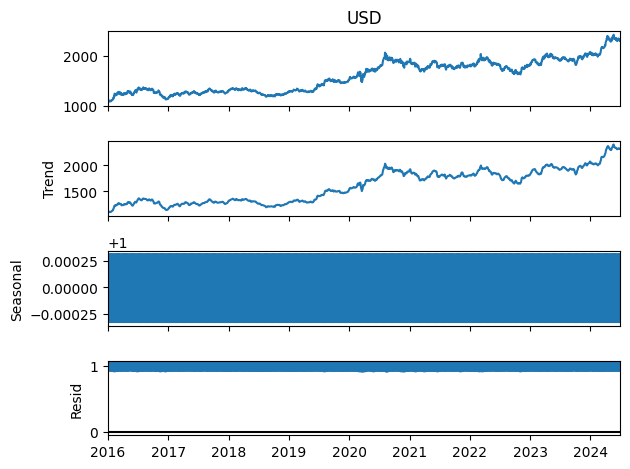

In [ ]:
decompose_result = seasonal_decompose(df['USD'],model='multiplicative')
decompose_result.plot()
plt.show()

No Such visibility of any pattern

Checking seasonality through usual computation

In [ ]:
y = np.log(df["USD"])
y.name = "USD"

In [ ]:
seasonal_df = y.to_frame()
seasonal_df

,USD
Name,
2016-01-01,6.966024
2016-01-04,6.986797
2016-01-05,6.981935
2016-01-06,6.995217
2016-01-07,7.008822
...,...
2024-06-24,7.753087
2024-06-25,7.751497
2024-06-26,7.740512


In [ ]:
seasonal_df["trend"] = seasonal_df["USD"].rolling(window=7, center=True).mean()
seasonal_df.head(10)

,USD,trend
Name,,
2016-01-01,6.966024,NaN
2016-01-04,6.986797,NaN
2016-01-05,6.981935,NaN
2016-01-06,6.995217,6.992470
2016-01-07,7.008822,6.995852
2016-01-08,7.004746,6.996629
2016-01-11,7.003747,6.998133
2016-01-12,6.989704,6.998441
2016-01-13,6.992234,6.996209


In [ ]:
seasonal_df["detrended"] = seasonal_df["USD"]-seasonal_df["trend"]
seasonal_df.head(10)

,USD,trend,detrended
Name,,,
2016-01-01,6.966024,NaN,NaN
2016-01-04,6.986797,NaN,NaN
2016-01-05,6.981935,NaN,NaN
2016-01-06,6.995217,6.992470,0.002747
2016-01-07,7.008822,6.995852,0.012969
2016-01-08,7.004746,6.996629,0.008117
2016-01-11,7.003747,6.998133,0.005614
2016-01-12,6.989704,6.998441,-0.008737
2016-01-13,6.992234,6.996209,-0.003974


In [ ]:
seasonal_df.index = pd.to_datetime(seasonal_df.index)
seasonal_df["month"] = seasonal_df.index.month
seasonal_df["seasonality"] = seasonal_df.groupby("month")["detrended"].transform("mean")
seasonal_df.head(15)

,USD,trend,detrended,month,seasonality
Name,,,,,
2016-01-01,6.966024,NaN,NaN,1,0.000334
2016-01-04,6.986797,NaN,NaN,1,0.000334
2016-01-05,6.981935,NaN,NaN,1,0.000334
2016-01-06,6.995217,6.992470,0.002747,1,0.000334
2016-01-07,7.008822,6.995852,0.012969,1,0.000334
2016-01-08,7.004746,6.996629,0.008117,1,0.000334
2016-01-11,7.003747,6.998133,0.005614,1,0.000334
2016-01-12,6.989704,6.998441,-0.008737,1,0.000334
2016-01-13,6.992234,6.996209,-0.003974,1,0.000334


In [ ]:
seasonal_df = y.to_frame()

# calculate the trend component
seasonal_df["trend"] = seasonal_df["USD"].rolling(window=7, center=True).mean()

# detrend the series
seasonal_df["detrended"] = seasonal_df["USD"] - seasonal_df["trend"]

# calculate the seasonal component
seasonal_df.index = pd.to_datetime(seasonal_df.index)
seasonal_df["month"] = seasonal_df.index.month
seasonal_df["seasonality"] = seasonal_df.groupby("month")["detrended"].transform("mean")

# get the residuals
seasonal_df["resid"] = seasonal_df["detrended"] - seasonal_df["seasonality"]

# display the DF
seasonal_df.head(15)

,USD,trend,detrended,month,seasonality,resid
Name,,,,,,
2016-01-01,6.966024,NaN,NaN,1,0.000334,NaN
2016-01-04,6.986797,NaN,NaN,1,0.000334,NaN
2016-01-05,6.981935,NaN,NaN,1,0.000334,NaN
2016-01-06,6.995217,6.992470,0.002747,1,0.000334,0.002413
2016-01-07,7.008822,6.995852,0.012969,1,0.000334,0.012635
2016-01-08,7.004746,6.996629,0.008117,1,0.000334,0.007783
2016-01-11,7.003747,6.998133,0.005614,1,0.000334,0.005280
2016-01-12,6.989704,6.998441,-0.008737,1,0.000334,-0.009071
2016-01-13,6.992234,6.996209,-0.003974,1,0.000334,-0.004309


In [ ]:
seasonal_df['trend']=np.exp(seasonal_df['trend'])
seasonal_df['seasonality']=np.exp(seasonal_df['seasonality'])
seasonal_df['resid']=np.exp(seasonal_df['resid'])

array([<Axes: xlabel='Name'>, <Axes: xlabel='Name'>,
       <Axes: xlabel='Name'>, <Axes: xlabel='Name'>], dtype=object)

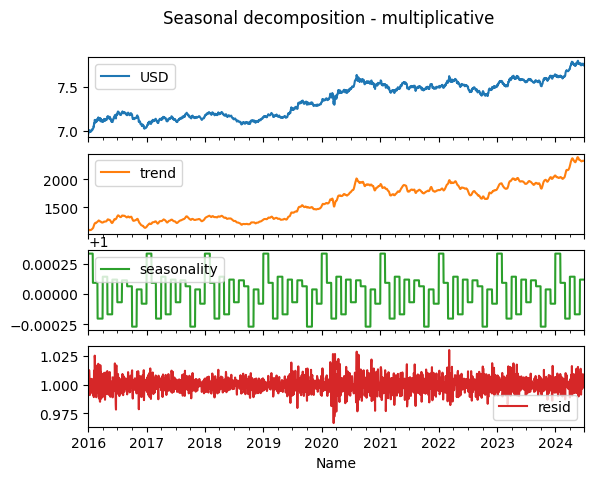

In [ ]:
seasonal_df.loc[:, ["USD", "trend", "seasonality", "resid"]].plot(subplots=True, title="Seasonal decomposition - multiplicative")

In [ ]:
df1=df['USD'].resample('MS').mean()
df1=pd.DataFrame(df1)
df1.head()

,USD
Name,
2016-01-01,1095.595238
2016-02-01,1199.911905
2016-03-01,1244.134783
2016-04-01,1242.261905
2016-05-01,1258.629545


/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


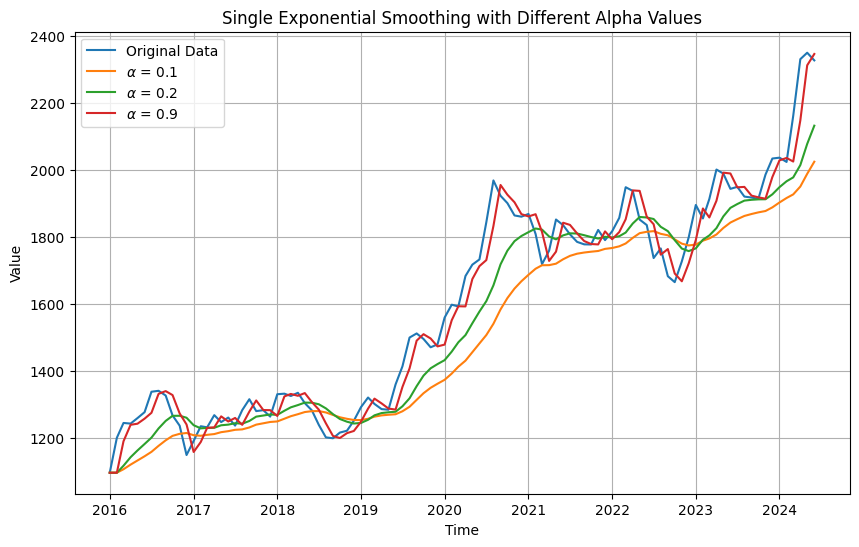

In [ ]:
alphas = [0.1, 0.2,0.9]

# Plot the original data
plt.figure(figsize=(10, 6))
plt.plot(df1, label='Original Data')

# Plot smoothed curves for different alphas
for alpha in alphas:
    model = SimpleExpSmoothing(df1).fit(smoothing_level=alpha)
    smoothed_data = model.fittedvalues
    plt.plot(smoothed_data,label=r'$\alpha$ = {}'.format(alpha))

plt.title('Single Exponential Smoothing with Different Alpha Values')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

As we can see from the above plot that trend is captured very nicely, alpha=0.9 is better capturing

**Double Exponential smoothing**

it helps in capturing trend nicely

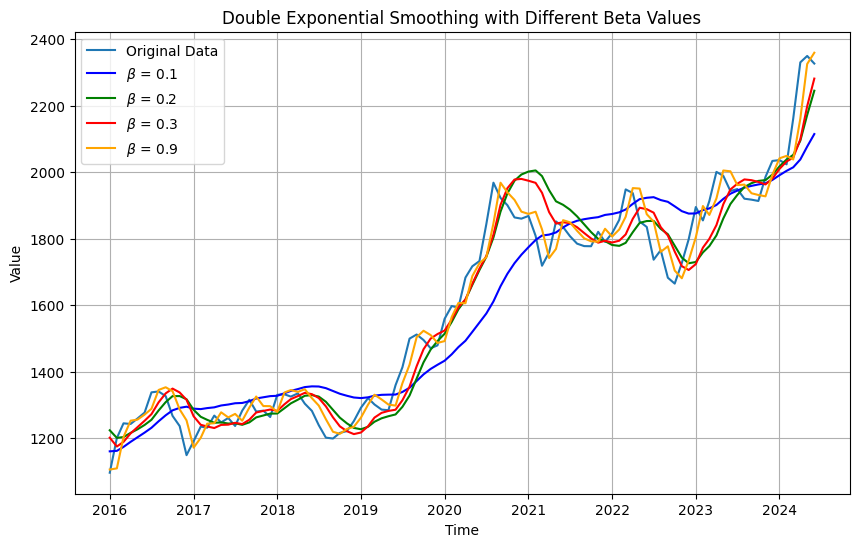

In [ ]:
betas = [0.1, 0.2, 0.3, 0.9]

# Plot the original data
plt.figure(figsize=(10, 6))
plt.plot(df1, label='Original Data')

# Define colors for each beta value
colors = ['blue', 'green', 'red', 'orange']

# Plot smoothed curves for different betas with different colors
for beta, color in zip(betas, colors):
    model = ExponentialSmoothing(df1, trend='add').fit(smoothing_level=beta)
    smoothed_data = model.fittedvalues
    plt.plot(smoothed_data, label=r'$\beta$ = {}'.format(beta), color=color)

plt.title('Double Exponential Smoothing with Different Beta Values')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

Higher Beta Values are capturing trend even more nicely

**Triple Exponential**
helps in capturing both trend and seasonality

In [ ]:
len(df1)

102

In [ ]:
df1.index.freq = 'MS'
train=df1[:-20]
test=df1[-20:]

In [ ]:
len(train),len(test)

(82, 20)

In [ ]:
def tes_optimizer(train, test, abg, trend_mode='add', seasonal_mode = 'mul', seasonal_period=12,step=len(test)):

  best_alpha, best_beta, best_gamma, best_mae = None, None, None, float("inf")
  for comb in abg:
          tes_model = ExponentialSmoothing(train, trend=trend_mode, seasonal=seasonal_mode, seasonal_periods=seasonal_period).\
              fit(smoothing_level=comb[0], smoothing_trend=comb[1], smoothing_seasonal=comb[2])
          y_pred = tes_model.forecast(step)
          mae = mean_absolute_error(test, y_pred)
          if mae < best_mae:
              best_alpha, best_beta, best_gamma, best_mae = comb[0], comb[1], comb[2], mae
          # print([round(comb[0], 2), round(comb[1], 2), round(comb[2], 2), round(mae, 2)])
  print("best_alpha:", round(best_alpha, 2), "best_beta:", round(best_beta, 2), "best_gamma:", round(best_gamma, 2),
            "best_mae:", round(best_mae, 4))
  return best_alpha, best_beta, best_gamma, best_mae

In [ ]:
# !pip install itertools
import itertools

In [ ]:
alphas = betas = gammas = np.arange(0.1, 1, 0.10)
abg = list(itertools.product(alphas, betas, gammas))

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
best_alpha, best_beta, best_gamma, best_mae = tes_optimizer(train,test, abg)

best_alpha: 0.9 best_beta: 0.8 best_gamma: 0.5 best_mae: 85.0796


In [ ]:
best_alpha, best_beta, best_gamma

(0.9, 0.8, 0.5)

In [ ]:
final_tes_model = ExponentialSmoothing(train, trend="add", seasonal="mul", seasonal_periods=12).\
            fit(smoothing_level=best_alpha, smoothing_trend=best_beta, smoothing_seasonal=best_gamma)

In [ ]:
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(test,final_tes_model.forecast(20))
mae

85.07955229896315

In [ ]:
y_forecast = final_tes_model.forecast(24)
y_forecast.index

DatetimeIndex(['2022-11-01', '2022-12-01', '2023-01-01', '2023-02-01',
               '2023-03-01', '2023-04-01', '2023-05-01', '2023-06-01',
               '2023-07-01', '2023-08-01', '2023-09-01', '2023-10-01',
               '2023-11-01', '2023-12-01', '2024-01-01', '2024-02-01',
               '2024-03-01', '2024-04-01', '2024-05-01', '2024-06-01',
               '2024-07-01', '2024-08-01', '2024-09-01', '2024-10-01'],
              dtype='datetime64[ns]', freq='MS')

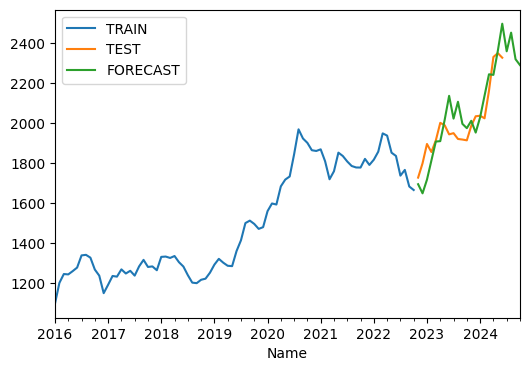

In [ ]:
train['USD'].plot(legend=True,label='TRAIN')
test['USD'].plot(legend=True,label='TEST',figsize=(6,4))
y_forecast.plot(legend=True,label='FORECAST')
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
y_pred = final_tes_model.forecast(20)
mape = mean_absolute_percentage_error(test, y_pred)
print(mape)

0.04279580943360935


The mean absolute error for trend additive for this smoothing model is 85.07955229896315 <br> and Mean Absolute Percentage error is 0.04279580943360935.